# 1. Import packages and data

In [240]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 1000)


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [241]:
# Define the file path
folder_path = r"C:\Users\sumit\Dropbox\WBS Bootcamp\Course\3. Data cleaning project\Group 4\Data"

# Rather manual stuff. But for an automated way, see Alternative II below 
df_prod = pd.read_csv(f"{folder_path}\\products.csv")
df_ord = pd.read_csv(f"{folder_path}\\orders.csv")
df_orderlines = pd.read_csv(f"{folder_path}\\orderlines.csv")
df_brands = pd.read_csv(f"{folder_path}\\brands.csv")

#Lets check if it works!
df_prod.head()

,sku,name,desc,price,promo_price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25,229.997,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364


# 2. Data cleaning I - data frames
## 2.1 Products dataframe

In [242]:
# Let's first visualize column data types and missing values
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19326 non-null  object
 1   name         19326 non-null  object
 2   desc         19319 non-null  object
 3   price        19280 non-null  object
 4   promo_price  19326 non-null  object
 5   in_stock     19326 non-null  int64 
 6   type         19276 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


**Note: ** Columns "price" and "promo_price" are strings, and not numerical. Some missing observations
### 2.1.1 Lets check duplicates and drop them

In [243]:
# Check duplicates
print("This dataframe has the following num of duplicates: ", len(df_prod)-len(df_prod.drop_duplicates()))
# Drop duplicates
df_prod_dropped = df_prod.drop_duplicates()
df_prod_dropped.shape

This dataframe has the following num of duplicates:  8746


(10580, 7)

In [244]:
# Check missing values
print("This dataframe has the following missing values: ", df_prod_dropped.isna().sum())
print(f"5 missing values represents {((df_prod_dropped.isna().sum() / df_prod_dropped.shape[0])*100).round(5)}% of the rows in our DataFrame")

# Drop missing
df_prod_dropped_na = df_prod_dropped.dropna(subset=["price"])
df_prod_dropped_na.loc[df_prod_dropped_na['desc'].isna(), 'desc'] = df_prod_dropped_na.loc[df_prod_dropped_na['desc'].isna(), 'name']
df_prod_dropped_na.info()

This dataframe has the following missing values:  sku             0
name            0
desc            7
price          46
promo_price     0
in_stock        0
type           50
dtype: int64
5 missing values represents sku           0.00
name          0.00
desc          0.07
price         0.43
promo_price   0.00
in_stock      0.00
type          0.47
dtype: float64% of the rows in our DataFrame
<class 'pandas.core.frame.DataFrame'>
Index: 10534 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          10534 non-null  object
 1   name         10534 non-null  object
 2   desc         10534 non-null  object
 3   price        10534 non-null  object
 4   promo_price  10534 non-null  object
 5   in_stock     10534 non-null  int64 
 6   type         10484 non-null  object
dtypes: int64(1), object(6)
memory usage: 658.4+ KB


### 2.1.2 Lets visualize price and promo_price columns

In [245]:
df_prod_dropped_na[["price", "promo_price"]].sample(100)

,price,promo_price
14114,4759,45.265.846
2456,1331,1.319.989
10899,171.98,1.329.899
18590,59,49
16637,45,389.995
17731,890.99,8.343.676
12784,49.95,474.901
15475,79.99,799.895
463,59.99,499.004
11940,199.98,1.979.899


> The issue of the column object type is quickly visible. Many rows in price_column have 2 dots "." in them.

In [246]:
(df_prod_dropped_na['promo_price'].str.count('\.') > 1).sum()

4597

In [247]:
two_dot_percentage_promo_price = ((df_prod_dropped_na.promo_price.str.contains("\d+\.\d+\.\d+").value_counts()[1] / df_prod_dropped_na.shape[0])*100).round(2)
print(f"The 2 dot problem represents {two_dot_percentage_promo_price}% of the rows in the 'promo_price' column.")

The 2 dot problem represents 43.64% of the rows in the 'promo_price' column.


> The issue of 2 dots affects rather a large portion of the sample and we need to find a way to resolve it (and <u>cannot drop</u> them). 

In [248]:
df_prod_dropped_na[["price", "promo_price"]].tail(10)

,price,promo_price
19316,6.999.003,69.99
19317,159.99,1.599.898
19318,139.99,1.399.897
19319,179,1.699.905
19320,149.99,1.499.795
19321,29.99,269.903
19322,69.95,649.903
19323,69.95,649.903
19324,69.95,649.903
19325,69.95,649.903


> A similar problem is also present in "price" column.

In [249]:
(df_prod_dropped_na['price'].str.count('\.') > 1).sum()

377

In [250]:
two_dot_percentage_price = ((df_prod_dropped_na.price.str.contains("\d+\.\d+\.\d+").value_counts()[1] / df_prod_dropped_na.shape[0])*100).round(2)
print(f"The 2 dot problem represents {two_dot_percentage_price}% of the rows in the 'price' column.")

The 2 dot problem represents 3.58% of the rows in the 'price' column.


> They are not as large portion of the sample. So <u>let's drop</u> the 2 dots occurences from the price column.

In [251]:
products_cl = df_prod_dropped_na#[~(df_prod_dropped_na['price'].str.count('\.') > 1)]
products_cl.shape

(10534, 7)

### 2.1.3 Now let's fix the promo_price column
To do that, we need to make some assumptions as below:

> **Assumption 1**: Price column is correct (after dropping 2 dots cases), but promo_price column needs cleaning.

In [252]:
products_cl.loc[products_cl.name.str.contains("Like new - Apple Lightning to USB 3.0 Adapter")] #.iloc[16114]

,sku,name,desc,price,promo_price,in_stock,type
16114,AP20129,Like new - Apple Lightning to USB 3.0 Adapter,Lightning connector adapter to USB 3.0,45,299.899,0,14365395


In [253]:
products_cl.loc[products_cl.name.str.contains("Just Mobile Support Xtand Go Z1 Car")] #iloc[1783]

,sku,name,desc,price,promo_price,in_stock,type
1782,JMO0071,Just Mobile Support Xtand Go Z1 Car,Car holder with 360 degree rotation for iPhone.,34.95,31.99,0,1216


As we can see here, the promo_price looks fine in some cases!

And in other cases, ....


The dot in promo_price looks 1 place right to where it is appropriate (compared to its price). To handle such different cases, we need another assumption with regard to price_promo's relation with price.

> **Assumption 2:** promo_price is almost always lower than price --> so that discounts are non-negative

In [254]:
### Write a function to drop the second "." occurrence from the promo_price column

In [255]:
def replace_second_dot(value):
    if isinstance(value, str):
        first_dot_index = value.find('.')
        second_dot_index = value.find('.', first_dot_index + 1)

        if second_dot_index != -1:
            return value[:first_dot_index] + value[first_dot_index:second_dot_index].replace('.', '') + value[second_dot_index:]
        else:
            return value
    else:
        return value

In [256]:
# Create a discount column

# Convert price column to numeric
products_cl['mod_price'] = pd.to_numeric(products_cl['price'], errors='coerce', downcast='float')

# Drop the second occurrence of "dots"
products_cl['mod_promo_price'] = pd.to_numeric(products_cl['promo_price'].apply(replace_second_dot), errors='coerce', downcast='float')

# Create the "discount" column
products_cl["discount"] = products_cl["mod_price"] - products_cl["mod_promo_price"]
products_cl["discount_share"] = products_cl["discount"] * 100 / products_cl["mod_price"]
products_cl.head()

,sku,name,desc,price,promo_price,in_stock,type,mod_price,mod_promo_price,discount,discount_share
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696,59.99,499.90,-439.91,-733.30
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,0,13855401,59.00,590.00,-531.00,-899.99
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,0,1387,59.00,569.90,-510.90,-865.93
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25,229.997,0,1230,25.00,230.00,-205.00,-819.99
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364,34.99,31.99,3.00,8.57


### 2.1.4 Modify promo_price so that discounts are non-negative (Assumption 2)

In [257]:
# Write the condition as "threshold"
threshold = products_cl["discount"] < -1

# Modify promo_price as long as the threshold holds
products_cl['mod_promo_price'] = np.where(threshold, products_cl['mod_promo_price'] / 10, products_cl['mod_promo_price'])

# Update discount column
products_cl["discount"] = products_cl["mod_price"] - products_cl["mod_promo_price"]

# Update discount_share columns
products_cl["discount_share"] = products_cl["discount"] * 100 / products_cl["mod_price"]

In [258]:
products_cl.loc[(products_cl['promo_price'].str.count('\.') > 1), ['price', 'mod_price', "promo_price", 'mod_promo_price', 'discount', 'discount_share']]

,price,mod_price,promo_price,mod_promo_price,discount,discount_share
50,119,119.00,1.119.976,112.00,7.00,5.88
51,1149,1149.00,10.449.923,1044.99,104.01,9.05
66,120,120.00,1.199.957,120.00,0.00,0.00
67,120,120.00,1.079.961,108.00,12.00,10.00
97,164.99,164.99,1.649.896,164.99,0.00,0.00
...,...,...,...,...,...,...
19300,119.99,119.99,1.199.897,119.99,0.00,0.00
19317,159.99,159.99,1.599.898,159.99,0.00,0.00
19318,139.99,139.99,1.399.897,139.99,0.00,0.00
19319,179,179.00,1.699.905,169.99,9.01,5.03


In [259]:
len(products_cl.loc[(products_cl['discount']<-1), ['price', 'mod_price', "promo_price", 'mod_promo_price', 'discount', 'discount_share']])

117

In [260]:
products_cl["discount"].describe()

count   10157.00
mean       86.04
std       181.44
min      -192.80
25%         5.00
50%        17.00
75%        76.86
max      2518.54
Name: discount, dtype: float64

### 2.1.5 Drop outliers from discount column

In [261]:
# calculate the quartiles
Q1 = products_cl["discount"].quantile(0.25)
Q3 = products_cl["discount"].quantile(0.75)

# calculate the interquartile range
IQR = Q3-Q1

# filter the DataFrame to include only "non-outliers"
products_cl = products_cl.loc[(products_cl["discount"] >= (Q1 - 1.5*IQR)) & (products_cl["discount"] <= (Q3 + 1.5*IQR)), :]
products_cl["discount"].describe()

count   8851.00
mean      30.95
std       42.13
min      -77.06
25%        4.20
50%       12.91
75%       37.75
max      184.58
Name: discount, dtype: float64

In [262]:
products_cl.loc[products_cl["discount"]<-1].shape

(111, 11)

In [263]:
# Following assumption 2, lets drop products with negative discounts
products_cl=products_cl.loc[~(products_cl["discount"]<-1)]
products_cl["discount"].describe()

count   8740.00
mean      31.44
std       42.14
min       -1.00
25%        4.96
50%       13.00
75%       38.72
max      184.58
Name: discount, dtype: float64

In [264]:
# Save file as csv
products_cl.to_csv("Cleaned_data/products_cleaned.csv", index=False)

## 2.2 Orders dataframe

In [265]:
# Let's first visualize column data types and missing values
df_ord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      226909 non-null  int64  
 1   created_date  226909 non-null  object 
 2   total_paid    226904 non-null  float64
 3   state         226909 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.9+ MB


In [266]:
df_ord["created_date"]=pd.to_datetime(df_ord["created_date"])
df_ord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      226909 non-null  int64         
 1   created_date  226909 non-null  datetime64[ns]
 2   total_paid    226904 non-null  float64       
 3   state         226909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.9+ MB


In [267]:
print("This dataframe has the following num of duplicates: ", len(df_ord)-len(df_ord.drop_duplicates()))

This dataframe has the following num of duplicates:  0


In [268]:
print("This dataframe has the following missing values: ", df_ord.isna().sum())

This dataframe has the following missing values:  order_id        0
created_date    0
total_paid      5
state           0
dtype: int64


In [269]:
orders_cl=df_ord.dropna()
orders_cl.isna().sum()

order_id        0
created_date    0
total_paid      0
state           0
dtype: int64

In [270]:
orders_cl.to_csv("Cleaned_data/orders_cleaned.csv", index=False)

## 2.3 Orderlines dataframe

In [271]:
# Let's first visualize column data types and missing values
df_orderlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                293983 non-null  int64 
 1   id_order          293983 non-null  int64 
 2   product_id        293983 non-null  int64 
 3   product_quantity  293983 non-null  int64 
 4   sku               293983 non-null  object
 5   unit_price        293983 non-null  object
 6   date              293983 non-null  object
dtypes: int64(4), object(3)
memory usage: 15.7+ MB


In [272]:
df_orderlines["date"]=pd.to_datetime(df_orderlines["date"])
df_orderlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                293983 non-null  int64         
 1   id_order          293983 non-null  int64         
 2   product_id        293983 non-null  int64         
 3   product_quantity  293983 non-null  int64         
 4   sku               293983 non-null  object        
 5   unit_price        293983 non-null  object        
 6   date              293983 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 15.7+ MB


In [273]:
print("This dataframe has the following num of duplicates: ",len(df_orderlines)-len(df_orderlines.drop_duplicates()))

This dataframe has the following num of duplicates:  0


In [274]:
print("This dataframe has the following missing values: ", df_orderlines.isna().sum())

This dataframe has the following missing values:  id                  0
id_order            0
product_id          0
product_quantity    0
sku                 0
unit_price          0
date                0
dtype: int64


In [275]:
df_orderlines.loc[(df_orderlines['unit_price'].str.count('\.') > 1), :]

,id,id_order,product_id,product_quantity,sku,unit_price,date
6,1119115,299544,0,1,APP1582,1.137.99,2017-01-01 01:17:21
11,1119126,299549,0,1,PAC0929,2.565.99,2017-01-01 02:07:42
15,1119131,299553,0,1,APP1854,3.278.99,2017-01-01 02:14:47
43,1119195,299582,0,1,PAC0961,2.616.99,2017-01-01 08:54:00
59,1119214,299596,0,1,PAC1599,2.873.99,2017-01-01 09:53:11
...,...,...,...,...,...,...,...
293862,1649999,452946,0,1,APP2075,2.999.00,2018-03-14 13:03:33
293887,1650045,527321,0,1,PAC2148,3.497.00,2018-03-14 13:10:15
293889,1650050,527324,0,1,PAC2117,3.075.00,2018-03-14 13:10:56
293911,1650088,527342,0,1,APP2492,1.329.00,2018-03-14 13:24:51


In [276]:
two_dot_percentage = ((df_orderlines.unit_price.str.contains("\d+\.\d+\.\d+").value_counts()[1] / df_orderlines.shape[0])*100).round(2)
print(f"The 2 dot problem represents {two_dot_percentage}% of the rows in our DataFrame")

two_dot_order_ids_list = df_orderlines.loc[df_orderlines.unit_price.str.contains("\d+\.\d+\.\d+"), "id_order"]
orderlines_cl = df_orderlines.loc[~df_orderlines.id_order.isin(two_dot_order_ids_list)]

orderlines_cl.shape[0]

The 2 dot problem represents 12.3% of the rows in our DataFrame


216250

In [277]:
# drop
orderlines_cl['unit_price'] = pd.to_numeric(orderlines_cl['unit_price'], errors='coerce', downcast='float')
orderlines_cl = orderlines_cl[~orderlines_cl['id_order'].isin(orderlines_cl.loc[orderlines_cl['unit_price'] < 0, 'id_order'])]
orderlines_cl.shape[0]

216248

In [278]:
orderlines_cl.to_csv("Cleaned_data/orderlines_cleaned.csv", index=False)

## 2.4 Brands dataframe

In [279]:
# Let's first visualize column data types and missing values
df_brands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   short   187 non-null    object
 1   long    187 non-null    object
dtypes: object(2)
memory usage: 3.0+ KB


In [280]:
df_brands.to_csv("Cleaned_data/brands_cleaned.csv", index=False)

# 3. Merge dataframes - completed orders only
## 3.1 Prepare product and orderlines DFs for merging

In [281]:
# Exclude orders with unknown products
# Let's start by making a list of known products.
# Get all product ids from products_cl 
known_skus_list = list(products_cl["sku"])

In [282]:
# Check where products ids in outlines and products dfs match
orderlines_qu=orderlines_cl.copy()
len(list(products_cl["sku"].unique())), len(list(orderlines_qu["sku"].unique()))

(8740, 6798)

In [283]:
orderlines_qu.sku.isin(known_skus_list).value_counts()

sku
True     207875
False      8373
Name: count, dtype: int64

In [284]:
# Restrict the orderlines product ids to known list
orders_with_unknown_products_list = list(orderlines_qu.loc[~orderlines_qu.sku.isin(known_skus_list), "id_order"])
orderlines_qu = orderlines_qu.loc[~orderlines_qu["id_order"].isin(orders_with_unknown_products_list), :]
len(list(products_cl["sku"].unique())), len(list(orderlines_qu["sku"].unique()))

(8740, 6155)

In [285]:
# Now adjust product ids in the products df
actual_prod_list = list(orderlines_qu["sku"].unique())
products_qu = products_cl.loc[products_cl["sku"].isin(actual_prod_list), :].copy()
len(list(products_cl["sku"].unique())), len(list(products_qu["sku"].unique())), len(list(orderlines_qu["sku"].unique()))

(8740, 6155, 6155)

## 3.2 Merge the two dataframes

In [286]:
df_merged_ol_prod = orderlines_qu.merge(products_qu, how="left", on="sku")

In [287]:
# let's also calculate the discount using unit_price **(discount_unit_price)**
df_merged_ol_prod["discount_unit_price"]=df_merged_ol_prod["mod_price"]-df_merged_ol_prod["unit_price"]
df_merged_ol_prod["discount_unit_price_share"]= df_merged_ol_prod["discount_unit_price"]*100/df_merged_ol_prod["mod_price"]
df_merged_ol_prod=df_merged_ol_prod.drop(axis=1, columns=["product_id", "id"])
df_merged_ol_prod.shape

(203410, 17)

In [288]:
# Following assumption 2, lets drop products with negative discounts
df_merged_ol_prod = df_merged_ol_prod[~df_merged_ol_prod['id_order'].isin(df_merged_ol_prod.loc[df_merged_ol_prod['discount_unit_price'] < -1, 'id_order'])]
df_merged_ol_prod = df_merged_ol_prod[~df_merged_ol_prod['id_order'].isin(df_merged_ol_prod.loc[df_merged_ol_prod['discount_share'] < -1, 'id_order'])]
df_merged_ol_prod = df_merged_ol_prod[~df_merged_ol_prod['id_order'].isin(df_merged_ol_prod.loc[df_merged_ol_prod['discount_unit_price_share'] < -1, 'id_order'])]
df_merged_ol_prod.shape

(196542, 17)

In [289]:
# calculate the quartiles
Q1 = df_merged_ol_prod["discount_unit_price"].quantile(0.25)
Q3 = df_merged_ol_prod["discount_unit_price"].quantile(0.75)

# calculate the interquartile range
IQR = Q3-Q1

# filter the DataFrame to include only "non-outliers"
orders_with_neg_discounts_list = list(df_merged_ol_prod.loc[(df_merged_ol_prod["discount_unit_price"] >= (Q1 - 1.5*IQR)) & (df_merged_ol_prod["discount_unit_price"] <= (Q3 + 1.5*IQR)), "id_order"])
df_merged_ol_prod=df_merged_ol_prod.loc[df_merged_ol_prod["id_order"].isin(orders_with_neg_discounts_list), :]
df_merged_ol_prod.describe()

,id_order,product_quantity,unit_price,date,in_stock,mod_price,mod_promo_price,discount,discount_share,discount_unit_price,discount_unit_price_share
count,183598.00,183598.00,183598.00,183598,183598.00,183598.00,183598.00,183598.00,183598.00,183598.00,183598.00
mean,411153.74,1.13,137.80,2017-09-03 07:40:10.872335360,0.56,158.26,140.14,18.12,18.40,20.45,19.58
min,241319.00,1.00,0.00,2017-01-01 00:07:19,0.00,2.99,0.90,-0.80,-0.89,-1.00,-0.97
25%,354250.25,1.00,25.99,2017-05-11 09:16:29.500000,0.00,35.00,26.99,4.01,6.25,5.00,6.85
50%,410281.50,1.00,59.99,2017-10-10 08:03:50,1.00,79.95,62.30,10.00,14.32,12.99,15.77
75%,467745.50,1.00,149.99,2017-12-20 19:03:29.500000,1.00,179.00,154.99,22.62,25.02,24.01,26.01
max,527401.00,999.00,999.00,2018-03-14 13:58:36,1.00,3159.00,3001.00,184.58,92.24,3152.41,100.00
std,65715.30,3.01,192.84,NaN,0.50,203.35,195.09,21.06,16.59,43.68,17.50


### Data cleaning steps - summary
- Minimum discounts possible "-1" - applied to both discounts calculated using promo_price and unit price
- Dropped outliers of discounts using the IQR method
- Dropped observations with two dots in the unit price (12.3%) and price (3.58%) columns

## 3.3 Restrict the focus to "Completed" orders

In [290]:
#len(list(orders_qu["order_id"].unique())), len(list(orderlines_qu["id_order"].unique())), len(list(df_merged_ol_prod["id_order"].unique()))
# Observe that order ids differ across dfs

In [291]:
# Get the order ids of the completed orders
compl_orders_df = orders_cl.copy()
compl_orders_df = compl_orders_df.loc[compl_orders_df.state == "Completed", :]
compl_orders_list = list(compl_orders_df["order_id"])

# Restrict the dfs to completed orders
orders_qu = orders_cl.loc[orders_cl["order_id"].isin(compl_orders_list), :].copy()
df_merged_ol_prod = df_merged_ol_prod.loc[df_merged_ol_prod["id_order"].isin(compl_orders_list), :].copy()
len(list(orders_qu.order_id.unique())), len(list(orderlines_qu.id_order.unique())), len(list(df_merged_ol_prod.id_order.unique()))

(46605, 162183, 36900)

In [292]:
# Readjust the orders df to keep order ids also present in df_merged_ol_prod
o_ids_in_both_list = list(df_merged_ol_prod["id_order"].unique())
orders_qu = orders_qu.loc[orders_qu["order_id"].isin(o_ids_in_both_list), :]
len(list(orders_qu.order_id.unique())), len(list(df_merged_ol_prod.id_order.unique()))

(36900, 36900)

## 3.4 Create new variables

In [293]:
# Create new columns "Old" and "repair service"
df_merged_ol_prod['combined'] = df_merged_ol_prod['name'] + ' ' + df_merged_ol_prod['desc']

# Define keywords that suggest refurbed products
searchfor = ["refurb", "refit", "renew", "second", "like new", "reconditioned", "used"]
searchfor2=["repair service"]

# Create a new column "Old"
df_merged_ol_prod["Old"] = df_merged_ol_prod['combined'].str.lower().apply(lambda x: 1 if any(i in x for i in searchfor) else 0)
df_merged_ol_prod["repair service"] = df_merged_ol_prod['combined'].str.lower().apply(lambda x: 1 if any(i in x for i in searchfor2) else 0)

In [294]:
df_merged_ol_prod["brand"]=df_merged_ol_prod["sku"].str[0:3]

In [295]:
df_merged_ol_prod["category"] = ""

df_merged_ol_prod.loc[df_merged_ol_prod["name"].str.contains("apple", case=False), "category"] += ", apple"
df_merged_ol_prod.loc[df_merged_ol_prod["name"].str.contains("^.{0,7}apple iphone|phone|mobile|smartphone", case=False), "category"] += ", smartphone"
df_merged_ol_prod.loc[df_merged_ol_prod["name"].str.contains("^.{0,7}apple ipod", case=False), "category"] += ", ipod"
df_merged_ol_prod.loc[df_merged_ol_prod["name"].str.contains("^.{0,7}apple ipad|tablet", case=False), "category"] += ", tablet"
df_merged_ol_prod.loc[df_merged_ol_prod["name"].str.contains("imac|mac mini|mac pro| mac ", case=False), "category"] += ", desktop"
df_merged_ol_prod.loc[df_merged_ol_prod["name"].str.contains("macbook", case=False), "category"] += ", laptop"
df_merged_ol_prod.loc[df_merged_ol_prod["desc"].str.contains("screen|monitor|keyboard|mouse|cable|connector|lightning to usb|wall socket|power strip|nas|server|raid|synology|adapter|dock|hub|connection|expansion box|battery|charger|flash drive|hard drive|pendrive|hard disk|memory|storage|^ssd|^hardssd|modules|ssd expansion|pointer|camera|^.{0,7}ram|thermometer|charger", case=False), "category"] = ", electronic_acc"
df_merged_ol_prod.loc[df_merged_ol_prod["desc"].str.contains("headset|headphones|earpod|airpod|earphones|speaker|music system", case=False), "category"] += ", headsets"
df_merged_ol_prod.loc[df_merged_ol_prod["desc"].str.contains("case|funda|housing|casing|folder|strap|armband|belt|bracelet|stand|support|protect|cover|sleeve|screensaver|shell", case=False), "category"] += ", non_electronic_acc"
df_merged_ol_prod.loc[df_merged_ol_prod["desc"].str.contains("^.{0,6}apple watch|smartwatch|smart watch", case=False), "category"] += ", smartwatch"
df_merged_ol_prod.loc[df_merged_ol_prod["desc"].str.contains("monitor", case=False), "category"] += ", monitor"
df_merged_ol_prod.loc[df_merged_ol_prod["desc"].str.contains("like new|refurb|refit|renew|second|like new|reconditioned|used", case=False), "category"] += ", refurbished"
#df_merged_ol_prod.loc[df_merged_ol_prod["desc"].str.contains("repair service", case=False), "category"] += ", repair service"

df_merged_ol_prod.loc[df_merged_ol_prod["category"] == "", "category"] += ", other"

df_merged_ol_prod["category"]=df_merged_ol_prod["category"].str.replace(", ", "", 1)
df_merged_ol_prod["category"]=df_merged_ol_prod["category"].str.replace("apple", "Apple")
df_merged_ol_prod["category"]=df_merged_ol_prod["category"].str.replace(",", ":", 1)
df_merged_ol_prod["category"]=df_merged_ol_prod["category"].str.replace(",", "")
df_merged_ol_prod["category"].value_counts().sort_index()

category
Apple                                                 405
Apple: desktop                                        137
Apple: desktop non_electronic_acc                       6
Apple: desktop refurbished                              5
Apple: headsets non_electronic_acc                     13
Apple: laptop                                          87
Apple: non_electronic_acc                             545
Apple: non_electronic_acc refurbished                  20
Apple: non_electronic_acc smartwatch                   43
Apple: non_electronic_acc smartwatch refurbished        3
Apple: refurbished                                    122
Apple: smartphone                                    1846
Apple: smartphone headsets                            948
Apple: smartphone headsets refurbished                  8
Apple: smartphone non_electronic_acc                  667
Apple: smartphone non_electronic_acc refurbished       38
Apple: smartphone refurbished                          56
Apple

In [296]:
#"Apple: refurbished"
df_merged_ol_prod.loc[(df_merged_ol_prod["Old"]==1) & (df_merged_ol_prod["brand"].isin(["APP", "AP2"])), "category"]="Apple: refurbished"
df_merged_ol_prod.loc[(df_merged_ol_prod["Old"]==1) & (~df_merged_ol_prod["brand"].isin(["APP", "AP2"])), "category"]="refurbished"

df_merged_ol_prod.loc[(df_merged_ol_prod["category"].str.contains("non_electronic_acc")) & (df_merged_ol_prod["brand"].isin(["APP", "AP2"])), "category"]="Apple"
df_merged_ol_prod.loc[(df_merged_ol_prod["category"].str.contains("non_electronic_acc")) & (~df_merged_ol_prod["brand"].isin(["APP", "AP2"])), "category"]="other"
df_merged_ol_prod.loc[(df_merged_ol_prod["category"]=="Apple") & (~df_merged_ol_prod["brand"].isin(["APP", "AP2"])), "category"]="other"

category_counts = df_merged_ol_prod["category"].value_counts().sort_index().to_dict()
category_counts

{'Apple': 1423,
 'Apple: desktop': 136,
 'Apple: laptop': 87,
 'Apple: refurbished': 380,
 'Apple: smartphone': 1846,
 'Apple: smartphone headsets': 948,
 'Apple: smartwatch': 464,
 'Apple: tablet': 475,
 'desktop': 1148,
 'desktop: headsets': 16,
 'desktop: laptop': 6,
 'electronic_acc': 23947,
 'electronic_acc: headsets': 394,
 'electronic_acc: headsets monitor': 44,
 'electronic_acc: monitor': 1017,
 'electronic_acc: smartwatch monitor': 25,
 'headsets': 911,
 'laptop': 823,
 'other': 12655,
 'refurbished': 337,
 'smartphone': 955,
 'smartphone: desktop': 4,
 'smartphone: headsets': 353,
 'smartphone: smartwatch': 2,
 'smartwatch': 60,
 'tablet': 469,
 'tablet: headsets': 5}

In [297]:
#searchfor = ["Apple: smartphone headsets", "Apple", "desktop: headsets", "headsets: smartwatch monitor", "desktop: laptop", "electronic_acc: headsets monitor"]
#df_merged_ol_prod.loc[(df_merged_ol_prod["category"].str.contains('|'.join(searchfor))) & (~df_merged_ol_prod["brand"].isin(["APP", "AP2"])), "category"]="other"
df_merged_ol_prod["category"] = df_merged_ol_prod["category"].replace({
    'Apple: smartphone headsets': 'Apple',     
    'desktop: headsets': "other",    
    'desktop: laptop': "other",    
    "electronic_acc": "other",    
    "electronic_acc: headsets monitor": "other",     
    "electronic_acc: monitor": "other",     
    "electronic_acc: smartwatch monitor": "other", 
    "electronic_acc: headsets": "other", 
    "smartphone: headsets": "other",   
    "smartphone: desktop": "other",     
    "smartphone: smartwatch": "other",  
    "tablet: headsets": "other",
    "headsets": "other"})
df_merged_ol_prod["category"].value_counts().sort_index()

category
Apple                  2371
Apple: desktop          136
Apple: laptop            87
Apple: refurbished      380
Apple: smartphone      1846
Apple: smartwatch       464
Apple: tablet           475
desktop                1148
laptop                  823
other                 39379
refurbished             337
smartphone              955
smartwatch               60
tablet                  469
Name: count, dtype: int64

In [298]:
### Create a product category for the most frequently sold products
n = 30

# Get the top n categories based on counts
top_n_categories = df_merged_ol_prod.groupby('type').count().nlargest(n, 'sku').index

# Create a new column 'product_type' with initial value 'others'
df_merged_ol_prod['product_type'] = 'others'

# Set 'top_30' for rows with categories in the top_n_categories
df_merged_ol_prod.loc[df_merged_ol_prod['type'].isin(top_n_categories), 'product_type'] = 'top_30'

print(f"With the {n} largest types, we account for {((df_merged_ol_prod.groupby('type').count().nlargest(n, 'sku')['sku'].sum()) / (df_merged_ol_prod.shape[0]) * 100).round(2)}% of all products.")

With the 30 largest types, we account for 79.88% of all products.


In [299]:
# Save the merged files
df_merged_ol_prod.to_csv("Cleaned_data/df_merged_ol_prod.csv", index=False)

## 3.4 Merge with orders

### 3.4.1 Prepare the merged df for the merge

In [300]:
len(list(orders_qu.order_id.unique())), len(list(df_merged_ol_prod.id_order.unique()))

(36900, 36900)

In [301]:
# Generate the alternative indicator for total pay column
df_merged_ol_prod["unit_price_revenue"] = df_merged_ol_prod["product_quantity"] * df_merged_ol_prod["unit_price"]
df_merged_ol_prod["promo_price_revenue"] = df_merged_ol_prod["product_quantity"] * df_merged_ol_prod["mod_promo_price"]

In [302]:
# Group by merged df by order id
ol_products_merged_group_orders = df_merged_ol_prod.groupby("id_order", as_index=False).agg({"unit_price_revenue": "sum", "promo_price_revenue": "sum", "product_quantity": "sum", "discount_share": "mean", "discount_unit_price_share": "mean"})

In [303]:
orders_qu_copy = orders_qu.copy()

In [304]:
diff_df = orders_qu_copy.merge(ol_products_merged_group_orders, left_on="order_id", right_on="id_order")
len(list(orders_qu_copy["order_id"].unique())), len(list(df_merged_ol_prod["id_order"].unique())), len(list(diff_df["id_order"].unique()))

(36900, 36900, 36900)

In [305]:
diff_df["diff_total_paid_unit_price"] = diff_df["total_paid"] - diff_df["unit_price_revenue"]
diff_df["diff_total_paid_promo_price"] = diff_df["total_paid"] - diff_df["promo_price_revenue"]

In [306]:
diff_df.to_csv("Cleaned_data/df_merged_ol_prod_ord.csv", index=False)

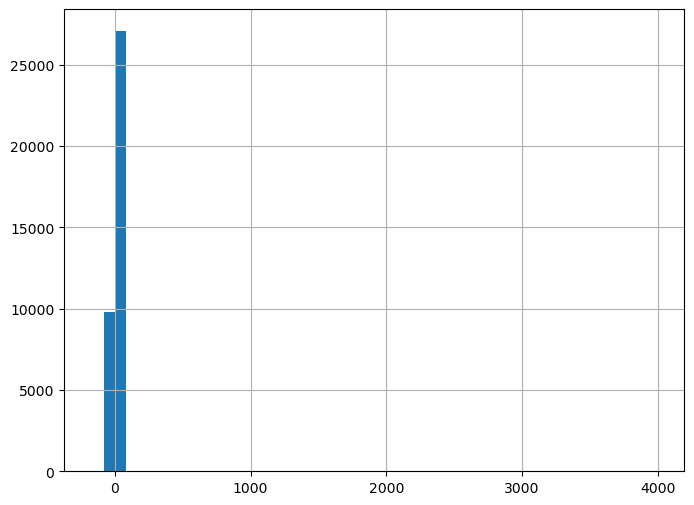

In [307]:
diff_df.diff_total_paid_unit_price.hist(bins= 50, figsize=(8,6));

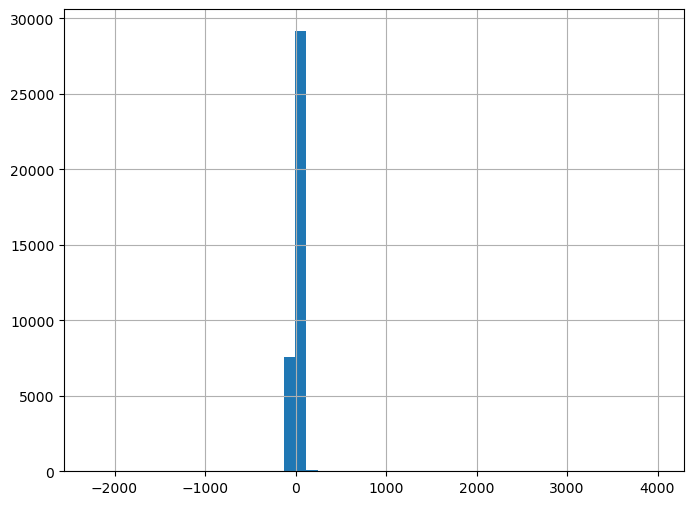

In [308]:
diff_df.diff_total_paid_promo_price.hist(bins= 50, figsize=(8,6));

In [309]:
diff_df.describe()

,order_id,created_date,total_paid,id_order,unit_price_revenue,promo_price_revenue,product_quantity,discount_share,discount_unit_price_share,diff_total_paid_unit_price,diff_total_paid_promo_price
count,36900.00,36900,36900.00,36900.00,36900.00,36900.00,36900.00,36900.00,36900.00,36900.00,36900.00
mean,415395.57,2017-09-13 06:09:19.897127424,166.82,415395.57,162.38,165.01,1.50,19.15,21.04,4.44,1.80
min,241423.00,2017-01-01 01:51:47,0.00,241423.00,2.49,2.00,1.00,-0.89,-0.82,-165.00,-2245.72
25%,363483.50,2017-06-13 15:08:51.500000,43.98,363483.50,39.98,39.99,1.00,8.61,9.93,0.00,-1.67
50%,418076.00,2017-10-28 23:14:43.500000,86.98,418076.00,82.64,86.99,1.00,16.14,17.65,4.99,3.99
75%,470922.25,2017-12-26 08:47:10,187.98,470922.25,183.72,187.98,2.00,25.74,27.96,6.99,6.99
max,527112.00,2018-03-14 12:03:52,6876.94,527112.00,6876.80,6911.79,72.00,88.58,96.29,3984.99,3982.29
std,65666.45,NaN,223.35,65666.45,222.75,224.39,1.28,15.45,16.13,25.16,42.40


In [310]:
diff_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36900 entries, 0 to 36899
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   order_id                     36900 non-null  int64         
 1   created_date                 36900 non-null  datetime64[ns]
 2   total_paid                   36900 non-null  float64       
 3   state                        36900 non-null  object        
 4   id_order                     36900 non-null  int64         
 5   unit_price_revenue           36900 non-null  float64       
 6   promo_price_revenue          36900 non-null  float64       
 7   product_quantity             36900 non-null  int64         
 8   discount_share               36900 non-null  float64       
 9   discount_unit_price_share    36900 non-null  float32       
 10  diff_total_paid_unit_price   36900 non-null  float64       
 11  diff_total_paid_promo_price  36900 non-nu

# 4. Merge dataframes - all orders
**The code is very close to that in section 3. Therefore it is not discussed separately to limit the file length.**

In [311]:
### Exclude orders with unknown products
# Let's start by making a list of known products.
# Get all product ids from products_cl 
known_skus_list = list(products_cl["sku"])

# Check where products ids in outlines and products dfs match
orderlines_qu=orderlines_cl.copy()
print(len(list(products_cl["sku"].unique())), len(list(orderlines_qu["sku"].unique())))
orderlines_qu.sku.isin(known_skus_list).value_counts()

# Restrict the orderlines product ids to known list
orders_with_unknown_products_list = list(orderlines_qu.loc[~orderlines_qu.sku.isin(known_skus_list), "id_order"])
orderlines_qu = orderlines_qu.loc[~orderlines_qu["id_order"].isin(orders_with_unknown_products_list), :]
print(len(list(products_cl["sku"].unique())), len(list(orderlines_qu["sku"].unique())))

# Now adjust product ids in the products df
actual_prod_list = list(orderlines_qu["sku"].unique())
products_qu = products_cl.loc[products_cl["sku"].isin(actual_prod_list), :].copy()
print(len(list(products_cl["sku"].unique())), len(list(products_qu["sku"].unique())), len(list(orderlines_qu["sku"].unique())))


df_merged_ol_prod_all = orderlines_qu.merge(products_qu, how="left", on="sku")
# let's also calculate the discount using unit_price **(discount_unit_price)**
df_merged_ol_prod_all["discount_unit_price"]=df_merged_ol_prod_all["mod_price"]-df_merged_ol_prod_all["unit_price"]
df_merged_ol_prod_all["discount_unit_price_share"]= df_merged_ol_prod_all["discount_unit_price"]*100/df_merged_ol_prod_all["mod_price"]
df_merged_ol_prod_all=df_merged_ol_prod_all.drop(axis=1, columns=["product_id", "id"])
df_merged_ol_prod_all.head()

# Following assumption 2, lets drop products with negative discounts
df_merged_ol_prod_all = df_merged_ol_prod_all[~df_merged_ol_prod_all['id_order'].isin(df_merged_ol_prod_all.loc[df_merged_ol_prod_all['discount_unit_price'] < -1, 'id_order'])]
df_merged_ol_prod_all = df_merged_ol_prod_all[~df_merged_ol_prod_all['id_order'].isin(df_merged_ol_prod_all.loc[df_merged_ol_prod_all['discount_share'] < -1, 'id_order'])]
df_merged_ol_prod_all = df_merged_ol_prod_all[~df_merged_ol_prod_all['id_order'].isin(df_merged_ol_prod_all.loc[df_merged_ol_prod_all['discount_unit_price_share'] < -1, 'id_order'])]
df_merged_ol_prod_all.shape


# calculate the quartiles
Q1 = df_merged_ol_prod_all["discount_unit_price"].quantile(0.25)
Q3 = df_merged_ol_prod_all["discount_unit_price"].quantile(0.75)

# calculate the interquartile range
IQR = Q3-Q1

# filter the DataFrame to include only "non-outliers"
orders_with_neg_discounts_list = list(df_merged_ol_prod_all.loc[(df_merged_ol_prod_all["discount_unit_price"] >= (Q1 - 1.5*IQR)) & (df_merged_ol_prod_all["discount_unit_price"] <= (Q3 + 1.5*IQR)), "id_order"])
df_merged_ol_prod_all=df_merged_ol_prod_all.loc[df_merged_ol_prod_all["id_order"].isin(orders_with_neg_discounts_list), :]
df_merged_ol_prod_all.describe()

# Get the order ids of the completed orders
compl_orders_df = orders_cl.copy()
# compl_orders_df = compl_orders_df.loc[compl_orders_df.state == "Completed", :]
compl_orders_list = list(compl_orders_df["order_id"])

# Restrict the dfs to completed orders
orders_qu = orders_cl.loc[orders_cl["order_id"].isin(compl_orders_list), :].copy()
df_merged_ol_prod_all = df_merged_ol_prod_all.loc[df_merged_ol_prod_all["id_order"].isin(compl_orders_list), :].copy()
print(len(list(orders_qu.order_id.unique())), len(list(orderlines_qu.id_order.unique())), len(list(df_merged_ol_prod_all.id_order.unique())))


# Readjust the orders df to keep order ids also present in df_merged_ol_prod_all
o_ids_in_both_list = list(df_merged_ol_prod_all["id_order"].unique())
orders_qu = orders_qu.loc[orders_qu["order_id"].isin(o_ids_in_both_list), :]
print(len(list(orders_qu.order_id.unique())), len(list(df_merged_ol_prod_all.id_order.unique())))

# Create new columns "Old" and "repair service"
df_merged_ol_prod_all['combined'] = df_merged_ol_prod_all['name'] + ' ' + df_merged_ol_prod_all['desc']

# Define keywords that suggest refurbed products
searchfor = ["refurb", "refit", "renew", "second", "like new", "reconditioned", "used"]
searchfor2=["repair service"]

# Create a new column "Old"
df_merged_ol_prod_all["Old"] = df_merged_ol_prod_all['combined'].str.lower().apply(lambda x: 1 if any(i in x for i in searchfor) else 0)
df_merged_ol_prod_all["repair service"] = df_merged_ol_prod_all['combined'].str.lower().apply(lambda x: 1 if any(i in x for i in searchfor2) else 0)

df_merged_ol_prod_all["brand"]=df_merged_ol_prod_all["sku"].str[0:3]


df_merged_ol_prod_all["category"] = ""

df_merged_ol_prod_all.loc[df_merged_ol_prod_all["name"].str.contains("apple", case=False), "category"] += ", apple"
df_merged_ol_prod_all.loc[df_merged_ol_prod_all["name"].str.contains("^.{0,7}apple iphone|phone|mobile|smartphone", case=False), "category"] += ", smartphone"
df_merged_ol_prod_all.loc[df_merged_ol_prod_all["name"].str.contains("^.{0,7}apple ipod", case=False), "category"] += ", ipod"
df_merged_ol_prod_all.loc[df_merged_ol_prod_all["name"].str.contains("^.{0,7}apple ipad|tablet", case=False), "category"] += ", tablet"
df_merged_ol_prod_all.loc[df_merged_ol_prod_all["name"].str.contains("imac|mac mini|mac pro| mac ", case=False), "category"] += ", desktop"
df_merged_ol_prod_all.loc[df_merged_ol_prod_all["name"].str.contains("macbook", case=False), "category"] += ", laptop"
df_merged_ol_prod_all.loc[df_merged_ol_prod_all["desc"].str.contains("screen|monitor|keyboard|mouse|cable|connector|lightning to usb|wall socket|power strip|nas|server|raid|synology|adapter|dock|hub|connection|expansion box|battery|charger|flash drive|hard drive|pendrive|hard disk|memory|storage|^ssd|^hardssd|modules|ssd expansion|pointer|camera|^.{0,7}ram|thermometer|charger", case=False), "category"] = ", electronic_acc"
df_merged_ol_prod_all.loc[df_merged_ol_prod_all["desc"].str.contains("headset|headphones|earpod|airpod|earphones|speaker|music system", case=False), "category"] += ", headsets"
df_merged_ol_prod_all.loc[df_merged_ol_prod_all["desc"].str.contains("case|funda|housing|casing|folder|strap|armband|belt|bracelet|stand|support|protect|cover|sleeve|screensaver|shell", case=False), "category"] += ", non_electronic_acc"
df_merged_ol_prod_all.loc[df_merged_ol_prod_all["desc"].str.contains("^.{0,6}apple watch|smartwatch|smart watch", case=False), "category"] += ", smartwatch"
df_merged_ol_prod_all.loc[df_merged_ol_prod_all["desc"].str.contains("monitor", case=False), "category"] += ", monitor"
df_merged_ol_prod_all.loc[df_merged_ol_prod_all["desc"].str.contains("like new|refurb|refit|renew|second|like new|reconditioned|used", case=False), "category"] += ", refurbished"
#df_merged_ol_prod_all.loc[df_merged_ol_prod_all["desc"].str.contains("repair service", case=False), "category"] += ", repair service"

df_merged_ol_prod_all.loc[df_merged_ol_prod_all["category"] == "", "category"] += ", other"

df_merged_ol_prod_all["category"]=df_merged_ol_prod_all["category"].str.replace(", ", "", 1)
df_merged_ol_prod_all["category"]=df_merged_ol_prod_all["category"].str.replace("apple", "Apple")
df_merged_ol_prod_all["category"]=df_merged_ol_prod_all["category"].str.replace(",", ":", 1)
df_merged_ol_prod_all["category"]=df_merged_ol_prod_all["category"].str.replace(",", "")
df_merged_ol_prod_all["category"].value_counts().sort_index()


#"Apple: refurbished"
df_merged_ol_prod_all.loc[(df_merged_ol_prod_all["Old"]==1) & (df_merged_ol_prod_all["brand"].isin(["APP", "AP2"])), "category"]="Apple: refurbished"
df_merged_ol_prod_all.loc[(df_merged_ol_prod_all["Old"]==1) & (~df_merged_ol_prod_all["brand"].isin(["APP", "AP2"])), "category"]="refurbished"

df_merged_ol_prod_all.loc[(df_merged_ol_prod_all["category"].str.contains("non_electronic_acc")) & (df_merged_ol_prod_all["brand"].isin(["APP", "AP2"])), "category"]="Apple"
df_merged_ol_prod_all.loc[(df_merged_ol_prod_all["category"].str.contains("non_electronic_acc")) & (~df_merged_ol_prod_all["brand"].isin(["APP", "AP2"])), "category"]="other"
df_merged_ol_prod_all.loc[(df_merged_ol_prod_all["category"]=="Apple") & (~df_merged_ol_prod_all["brand"].isin(["APP", "AP2"])), "category"]="other"

category_counts = df_merged_ol_prod_all["category"].value_counts().sort_index().to_dict()
category_counts


#searchfor = ["Apple: smartphone headsets", "Apple", "desktop: headsets", "headsets: smartwatch monitor", "desktop: laptop", "electronic_acc: headsets monitor"]
#df_merged_ol_prod_all.loc[(df_merged_ol_prod_all["category"].str.contains('|'.join(searchfor))) & (~df_merged_ol_prod_all["brand"].isin(["APP", "AP2"])), "category"]="other"
df_merged_ol_prod_all["category"] = df_merged_ol_prod_all["category"].replace({
    'Apple: smartphone headsets': 'Apple',     
    'desktop: headsets': "other",    
    'desktop: laptop': "other",    
    "electronic_acc": "other",    
    "electronic_acc: headsets monitor": "other",     
    "electronic_acc: monitor": "other",     
    "electronic_acc: smartwatch monitor": "other", 
    "electronic_acc: headsets": "other", 
    "smartphone: headsets": "other",   
    "smartphone: desktop": "other",     
    "smartphone: smartwatch": "other",  
    "tablet: headsets": "other",
    "headsets": "other"})
df_merged_ol_prod_all["category"].value_counts().sort_index()


n = 30

# Get the top n categories based on counts
top_n_categories = df_merged_ol_prod_all.groupby('type').count().nlargest(n, 'sku').index

# Create a new column 'product_type' with initial value 'others'
df_merged_ol_prod_all['product_type'] = 'others'

# Set 'top_30' for rows with categories in the top_n_categories
df_merged_ol_prod_all.loc[df_merged_ol_prod_all['type'].isin(top_n_categories), 'product_type'] = 'top_30'

print(f"With the {n} largest types, we account for {((df_merged_ol_prod_all.groupby('type').count().nlargest(n, 'sku')['sku'].sum()) / (df_merged_ol_prod_all.shape[0]) * 100).round(2)}% of all products.")

df_merged_ol_prod_all.to_csv("Cleaned_data/df_merged_ol_prod_all.csv", index=False)

print(len(list(orders_qu.order_id.unique())), len(list(df_merged_ol_prod_all.id_order.unique())))

# Generate the alternative indicator for total pay column
df_merged_ol_prod_all["unit_price_revenue"] = df_merged_ol_prod_all["product_quantity"] * df_merged_ol_prod_all["unit_price"]
df_merged_ol_prod_all["promo_price_revenue"] = df_merged_ol_prod_all["product_quantity"] * df_merged_ol_prod_all["mod_promo_price"]

# Group by merged df by order id
ol_products_merged_group_orders = df_merged_ol_prod_all.groupby("id_order", as_index=False).agg({"unit_price_revenue": "sum", "promo_price_revenue": "sum", "product_quantity": "sum", "discount_share": "mean", "discount_unit_price_share": "mean"})

orders_qu_copy = orders_qu.copy()
df_merged_ol_prod_ord_all = orders_qu_copy.merge(ol_products_merged_group_orders, how="left", left_on="order_id", right_on="id_order")
print(len(list(orders_qu_copy["order_id"].unique())), len(list(df_merged_ol_prod_all["id_order"].unique())), len(list(df_merged_ol_prod_ord_all["id_order"].unique())))

df_merged_ol_prod_ord_all["diff_total_paid_unit_price"] = df_merged_ol_prod_ord_all["total_paid"] - df_merged_ol_prod_ord_all["unit_price_revenue"]
df_merged_ol_prod_ord_all["diff_total_paid_promo_price"] = df_merged_ol_prod_ord_all["total_paid"] - df_merged_ol_prod_ord_all["promo_price_revenue"]

df_merged_ol_prod_ord_all.to_csv("Cleaned_data/df_merged_ol_prod_ord_all.csv", index=False)

df_merged_ol_prod_ord_all_ltd=df_merged_ol_prod_ord_all[["order_id", "state", "total_paid"]]
df_merged_ol_prod_all= df_merged_ol_prod_all.merge(df_merged_ol_prod_ord_all_ltd, how="left", left_on="id_order", right_on="order_id")
df_merged_ol_prod_all.to_csv("Cleaned_data/df_merged_ol_prod_all.csv", index=False)

8740 6798
8740 6155
8740 6155 6155
226904 162183 144416
144416 144416
With the 30 largest types, we account for 76.89% of all products.
144416 144416
144416 144416 144416
